## 2024 애플 주가 inclass

In [1]:
!pip install pandas
!pip install numpy
!pip install yfinance
!pip install matplotlib
!pip install tensorflow


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.1905
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0221
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0121
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0083
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0069
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0066
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0055
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0051
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0047
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0055
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0052
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0047
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0049
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0050
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0046
Epoc

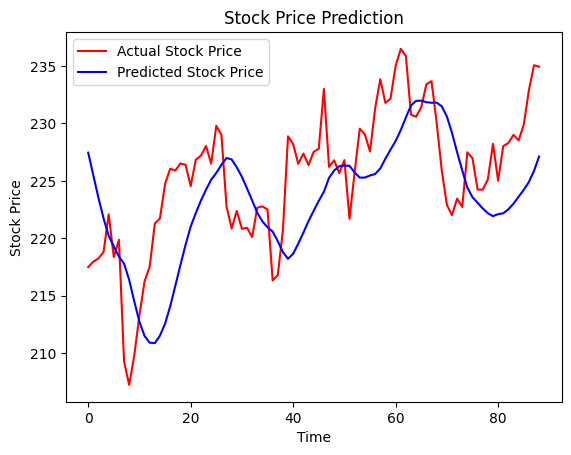

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 1. 애플 주가 데이터 로드
# 애플 주식 데이터 다운로드
data = yf.download('AAPL', start='2022-12-1', end='2024-11-30')
data.head()

# 2. 데이터 전처리
# 종가 데이터만 선택
close_prices = data['Close'].values

# 데이터 정규화 (0-1 사이)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices.reshape(-1, 1))

# 3. 데이터셋 생성
# 데이터셋 생성 함수
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# 데이터셋 생성
time_step = 60
X, y = create_dataset(scaled_prices, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# 4. RNN 모델 구축
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # 다음날 가격 예측

model.compile(optimizer='adam', loss='mean_squared_error')

# 5. 데이터 학습
# 데이터 나누기
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 모델 학습시키기
model.fit(X_train, y_train, epochs=50, batch_size=32)

# 6. 모델 평가 및 예측 결과 시각화
# 예측
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# 비교 그래프 그리기
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='red', label='Actual Stock Price')
plt.plot(predicted_prices, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
X